In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import random

import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize
import json



In [34]:
df = pd.read_csv("../csv/filtered_df_clustered_lemmitized.csv")

df

,file,title,definition,sentence_emb,prism:publicationName,cluster,non-stop-words,non_stopword_emb,cluster_non_stop_words,lemmetized_text,lemmitization_emb,lem_clusters
0,./full_texts/10.1016/j.dcan.2023.02.017/10.101...,Editorial Board,digital twin is a simulation model of the phys...,"[-0.03444482758641243, 0.0023884980473667383, ...",Digital Communications and Networks,56,digital twin simulation model physical assets ...,"[-0.022495757788419724, 9.898456482915208e-05,...",526,"digital twin simulation model physical asset ,...","[-0.02326817624270916, 0.004337960388511419, -...",72
1,./full_texts/10.1016/j.micpro.2023.104794/10.1...,Towards a wickless smooth–Wall aluminium food ...,Digital Twins is a transformation of technolog...,"[-0.017254427075386047, 0.006843416020274162, ...",Microprocessors and Microsystems,53,Digital Twins transformation technology new di...,"[-0.0068440246395766735, 0.002657392993569374,...",174,Digital Twins transformation technology new di...,"[-0.008395524695515633, 0.0005101208807900548,...",62
2,./full_texts/10.1016/j.micpro.2023.104794/10.1...,Towards a wickless smooth–Wall aluminium food ...,Digital Twins is a collaboration of various in...,"[-0.003896602662280202, -0.002639580052345991,...",Microprocessors and Microsystems,293,Digital Twins collaboration various industries...,"[-0.0013328647473827004, -0.015051893889904022...",282,"Digital Twins collaboration various industry ,...","[-0.0008822821546345949, -0.013520732522010803...",62
3,./full_texts/10.1016/j.apmt.2018.11.003/10.101...,Editorial,digital twin is a virtual replica of the hardw...,"[-0.0317268893122673, 0.009438682347536087, -0...",Applied Materials Today,358,digital twin virtual replica hardware successf...,"[-0.020208949223160744, 0.012693223543465137, ...",322,digital twin virtual replica hardware successf...,"[-0.017557673156261444, 0.010194099508225918, ...",1
4,./full_texts/10.1016/j.jmsy.2020.08.001/10.101...,Platinum-based heterogeneous nanomaterials via...,digital twin is a very significant and promisi...,"[-0.03302871435880661, 0.004698874428868294, -...",Journal of Manufacturing Systems,6,digital twin significant promising research as...,"[-0.02137889713048935, -0.0019160333322361112,...",595,digital twin significant promising research as...,"[-0.02137889713048935, -0.0019160333322361112,...",35
...,...,...,...,...,...,...,...,...,...,...,...,...
772,./full_texts/10.1016/j.ifacol.2022.04.220/10.1...,Recent advances in wireless sensor networks fo...,Digital Twin is defined as a set of adaptive m...,"[-0.035359013825654984, 0.02325472980737686, -...",IFAC-PapersOnLine,35,Digital Twin defined set adaptive models emula...,"[-0.028353773057460785, 0.0181508157402277, -0...",196,Digital Twin defined set adaptive model emulat...,"[-0.02791772596538067, 0.017710652202367783, -...",25
773,./full_texts/10.1016/j.ifacol.2022.04.220/10.1...,Recent advances in wireless sensor networks fo...,Digital Twin is a Digital Twin devoted to the ...,"[-0.033648714423179626, 0.013556599617004395, ...",IFAC-PapersOnLine,355,Digital Twin Digital Twin devoted mirroring hu...,"[-0.031256064772605896, 0.011717641726136208, ...",341,Digital Twin Digital Twin devoted mirroring hu...,"[-0.029852308332920074, 0.01311282254755497, 0...",38
774,./full_texts/10.1016/j.engappai.2023.106813/10...,The Cyber-physical E-machine Manufacturing Sys...,digital twin is a virtual replica of a physica...,"[-0.040585026144981384, -0.004295204300433397,...",Engineering Applications of Artificial Intelli...,366,"digital twin virtual replica physical asset , ...","[-0.03572925925254822, -0.008361298590898514, ...",576,"digital twin virtual replica physical asset , ...","[-0.034440405666828156, -0.00822803657501936, ...",72
775,./full_texts/10.1016/j.energy.2023.127317/10.1...,Chapter 1.18 Emergency Alert System,defined digital twin as a representation of a ...,"[-0.034567467868328094, 0.017452038824558258, ...",Energy,375,defined digital twin representation physical o

In [18]:
all_clusters = []
for c in range(100):
    cluster = df[df["lem_clusters"]==c][["definition", "prism:publicationName", "title","non-stop-words"]].reset_index(drop=True)
    print(" ---------------- ")
    print("CLUSTER #", c)
    this_cluster = []
    for i in range(len(cluster)):
        this_cluster.append(cluster.loc[i]["non-stop-words"].lower())
        print(cluster.loc[i]["non-stop-words"])
    all_clusters.append(this_cluster)

 ---------------- 
CLUSTER # 0
digital twin digital representation physical asset reproducing data model , behavior , communication physical assets. ” [ 48 ] 2021.7 “ digital twin virtual model physical entity , dynamic , bi-directional links physical entity corresponding twin digital domain. ” Table 4 Cyber-Physical System definition
 ---------------- 
CLUSTER # 1
digital twin virtual replica hardware successfully constructed utilized different manufacturing processes many industries government agencies
digital twin virtual double product , machine , process complete production facility
Digital twin concept origins product lifecycle management ( PLM )
digital twin complete , application-independent digital description products , devices , machines , plants , factories , systems processes
digital twin model entire asset , piece manufacturing equipment , motor pump
Digital twin virtual model process , product service
Digital twin defined virtual representation manufacturing elements man

In [19]:
all_clusters_filtered = []
for cluster in all_clusters:
    all_clusters_filtered.append(random.choice(cluster))
all_clusters_filtered

['digital twin digital representation physical asset reproducing data model , behavior , communication physical assets. ” [ 48 ] 2021.7 “ digital twin virtual model physical entity , dynamic , bi-directional links physical entity corresponding twin digital domain. ” table 4 cyber-physical system definition',
 'digital twin platform service ( paas ) offering provides digital twin architecture create manage models physical environments like cities , buildings , factories',
 'digital twin relatively new concept , practical applications digital twin already developed reported literature',
 'digital twin form model , model building activity requires careful planning , system ’ understanding execution',
 'digital twin highly realistic digital replica physical product , system , process',
 'digital twin representation actual component made via use simulations service metadata [ 48 ]',
 'digital twin contemporary digital representation paradigm capable encompassing complex interactions within 

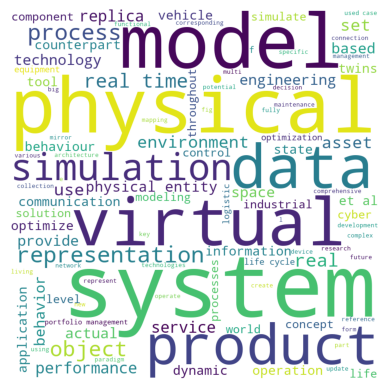

Word: representation, 15
Word: physical, 33
Word: asset, 8
Word: reproducing, 1
Word: data, 20
Word: model, 32
Word: behavior, 6
Word: communication, 5
Word: virtual, 24
Word: entity, 2
Word: dynamic, 5
Word: bi, 1
Word: directional, 1
Word: links, 1
Word: corresponding, 3
Word: domain, 1
Word: table, 1
Word: cyber, 4
Word: system, 37
Word: definition, 1
Word: platform, 1
Word: service, 7
Word: paas, 1
Word: offering, 1
Word: architecture, 3
Word: create, 3
Word: manage, 1
Word: like, 2
Word: cities, 1
Word: factories, 1
Word: relatively, 1
Word: new, 3
Word: concept, 4
Word: practical, 2
Word: already, 2
Word: developed, 2
Word: reported, 1
Word: literature, 1
Word: form, 3
Word: building, 2
Word: activity, 1
Word: requires, 1
Word: careful, 1
Word: planning, 1
Word: understanding, 1
Word: execution, 1
Word: highly, 1
Word: realistic, 2
Word: replica, 7
Word: product, 18
Word: process, 15
Word: actual, 6
Word: component, 4
Word: made, 2
Word: via, 2
Word: use, 8
Word: metadata, 1
Word

{'system': 37,
 'physical': 33,
 'model': 32,
 'virtual': 24,
 'data': 20,
 'product': 18,
 'simulation': 16,
 'representation': 15,
 'process': 15,
 'object': 13,
 'real time': 11,
 'real': 10,
 'asset': 8,
 'use': 8,
 'environment': 8,
 'set': 8,
 'service': 7,
 'replica': 7,
 'performance': 7,
 'behavior': 6,
 'actual': 6,
 'technology': 6,
 'engineering': 6,
 'based': 6,
 'provide': 6,
 'space': 6,
 'physical entity': 6,
 'communication': 5,
 'dynamic': 5,
 'information': 5,
 'vehicle': 5,
 'optimize': 5,
 'operation': 5,
 'counterpart': 5,
 'tool': 5,
 'behaviour': 5,
 'state': 5,
 'twins': 5,
 'application': 5,
 'et al': 5,
 'cyber': 4,
 'concept': 4,
 'component': 4,
 'level': 4,
 'life': 4,
 'modeling': 4,
 'control': 4,
 'industrial': 4,
 'throughout': 4,
 'solution': 4,
 'processes': 4,
 'simulate': 4,
 'world': 4,
 'optimization': 4,
 'logistic': 4,
 'equipment': 4,
 'f': 4,
 'life cycle': 4,
 'portfolio management': 4,
 'corresponding': 3,
 'architecture': 3,
 'create': 3,


In [26]:
text = " ".join(all_clusters_filtered).replace(" et al.", " ")

# Create WordCloud object
wordcloud = WordCloud(
    width=800,
    height=800,
    max_words=100,
    stopwords=["the", "a", "an", "is", "of", "digital", "twin", "et" "al", "et al", "et al", "defined", "describes", "et al."],
    background_color="white",
    # colormap="viridis",
)

# Generate word cloud
wordcloud.generate(text=text)

# Display word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


frequencies = wordcloud.process_text(text)
# Sort the frequencies based on the values
for word, freq in frequencies.items():
    print(f"Word: {word}, {freq}")

sorted_frequencies = {k: v for k, v in sorted(frequencies.items(), key=lambda item: item[1], reverse=True)}
sorted_frequencies


In [33]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
from nltk import bigrams
from collections import Counter

# Download the stopwords from NLTK
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


# Tokenize the text
word_tokens = word_tokenize(text)

# Remove the stop words and punctuations
filtered_text = [word for word in word_tokens if word.casefold() not in stop_words and word not in string.punctuation]
# Assuming 'filtered_text' is your text after preprocessing
filtered_text = " ".join(filtered_text)

# Tokenize the text
tokens = nltk.word_tokenize(filtered_text)

# Generate bigrams
bigrams = list(bigrams(tokens))

# Frequency analysis
bigram_counts = Counter(bigrams)

# Print the 10 most common bigrams and their counts
for bigram, count in bigram_counts.most_common(500):
    print( " ".join(list(bigram)), count) 


digital twin 104
twin virtual 13
twin digital 11
digital representation 6
physical entity 6
twin defined 6
physical system 6
et al 5
digital twins 5
digital replica 4
life cycle 4
twin model 4
2021 digital 4
al digital 4
portfolio management 4
virtual representation 4
process simulation 4
representation physical 3
physical asset 3
virtual model 3
replica physical 3
physical product 3
environment digital 3
set virtual 3
virtual information 3
information constructs 3
machine learning 3
system digital 3
data information 3
twin comprehensive 3
counterpart physical 3
twin set 3
fig digital 3
physical object 3
virtual replica 3
physical space 3
big data 3
f r 3
r e 3
e f 3
object process 3
management engineering 3
engineering aveva 3
aveva france 3
director process 3
simulation aveva 3
aveva usa 3
model physical 2
cyber-physical system 2
applications digital 2
system ’ 2
product system 2
system process 2
process digital 2
twin representation 2
representation actual 2
constructs fully 2
fully

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mahmoudouf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahmoudouf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
wordcloud.to_file("100.jpg")

# N-gram frequency analysis

In [31]:
# Tokenize
tokens = word_tokenize(" ".join(all_clusters_filtered).replace(" et al.", " "))

# Lowercase (optional)
tokens = [token.lower() for token in tokens]
stopwords=["the", "a", "an", "is", "of", "digital", "twin", "twins", "also", "f","r", "e"]
# Remove punctuation (optional)
import string
nonpunct_tokens = [token for token in tokens if token not in string.punctuation and token not in stopwords and len(token) > 2]

# Use 'nonpunct_tokens' if punctuation removal is applied
tokens = nonpunct_tokens

def calculate_n_gram_frequencies(tokens, n_max):
    """Calculates frequencies for n-grams from 1 to n_max.

    Args:
        tokens: A list of preprocessed text tokens.
        n_max: The maximum n-gram size to consider.

    Returns:
        A dictionary containing n-grams and their frequencies.
    """

    n_gram_freqs = {}
    for n in range(1, n_max + 1):
        ngram_generator = ngrams(tokens, n)
        n_gram_freqs[n] = nltk.FreqDist(ngram_generator)
    return n_gram_freqs

# Example usage
n_gram_freqs = calculate_n_gram_frequencies(tokens, 3)


In [32]:
n_gram_freqs

{1: FreqDist({('physical',): 44, ('system',): 27, ('data',): 25, ('virtual',): 25, ('model',): 22, ('representation',): 16, ('real',): 16, ('product',): 16, ('process',): 13, ('simulation',): 11, ...}),
 2: FreqDist({('virtual', 'representation'): 7, ('representation', 'physical'): 6, ('physical', 'system'): 6, ('physical', 'object'): 5, ('real', 'time'): 5, ('physical', 'asset'): 4, ('virtual', 'model'): 4, ('physical', 'entity'): 4, ('park', '2019'): 4, ('life', 'cycle'): 3, ...}),
 3: FreqDist({('2018', 'tao', '2018'): 3, ('virtual', 'model', 'physical'): 2, ('representation', 'physical', 'object'): 2, ('set', 'virtual', 'information'): 2, ('virtual', 'information', 'constructs'): 2, ('information', 'constructs', 'fully'): 2, ('constructs', 'fully', 'describes'): 2, ('fully', 'describes', 'potential'): 2, ('describes', 'potential', 'actual'): 2, ('potential', 'actual', 'physical'): 2, ...})}

In [36]:

for k, v in n_gram_freqs.items():
    print(k, "- GRAM ")
    for k2, v2 in v.items():
        if v2 > 1 and k ==1:
            for i in k2:
                print(i, end=" ")
            print(v2)
    print("  ---------------- ")

1 - GRAM 
representation 16
physical 44
asset 10
data 25
model 22
behavior 7
communication 2
assets 2
virtual 25
entity 8
dynamic 5
links 2
domain 3
table 2
cyber-physical 2
system 27
real 16
product 16
process 13
use 3
information 10
life 5
cycle 3
object 10
application 3
2019 10
environment 4
designed 2
accurately 2
objects 5
processes 6
complex 4
environments 2
help 2
make 2
service 6
components 4
ensuring 2
performing 2
structure 3
real-time 9
high-fidelity 3
entities 2
defined 9
set 7
constructs 2
fully 2
describes 4
potential 3
actual 3
manufactured 2
micro 2
atomic 2
level 4
macro 2
geometrical 2
form 3
represents 3
network 2
simulation 11
integrates 3
parameters 3
multiscale 2
models 11
modeling 4
predicting 2
connection 2
lifecycle 6
space 5
characteristics 5
time 6
evolution 2
methods 2
technology 6
industry 4
operational 2
intelligence 3
decision-making 2
key 2
smart 2
performance 3
maintenance 3
throughout 2
mirror 5
element 3
4.0 3
comprehensive 4
individual 2
2018 11
copy